<a href="https://colab.research.google.com/github/yessss28/Estadistica/blob/main/Regresi%C3%B3n_lineal_m%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv ('https://raw.githubusercontent.com/yessss28/Estadistica/refs/heads/main/Churn_Modelling%20(1).csv')
df.dropna(inplace=True)
df
df.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


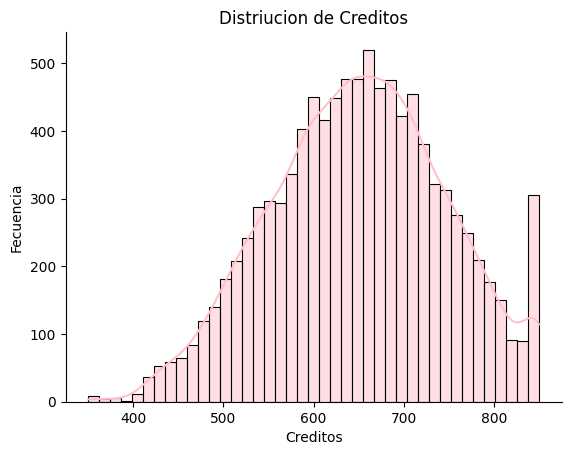

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CreditScore'], kde = True, color = 'pink')
plt.xlabel('Creditos')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Creditos')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no hay datos atipicos

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(Geography)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#No se rechaza la hipotesis nula por que no hay diferencia de grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Geography),2.0,3.782055e+09,1.891028e+09,0.571689,0.56459
Residual,9995.0,3.306138e+13,3.307792e+09,NaN,NaN


In [7]:
df.drop(columns = ["Gender"], inplace = True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


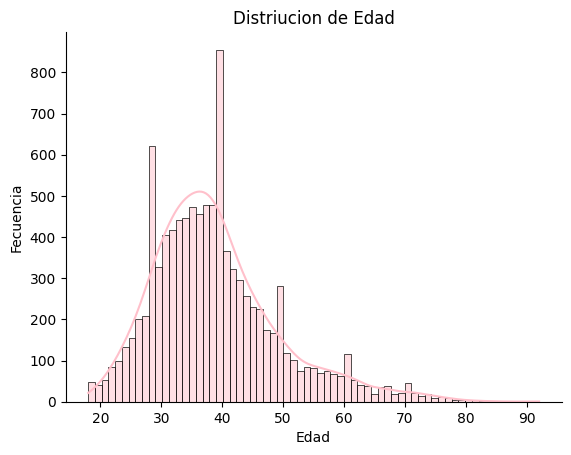

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde = True, color = 'pink')
plt.xlabel('Edad')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Edad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no hay datos atipicos

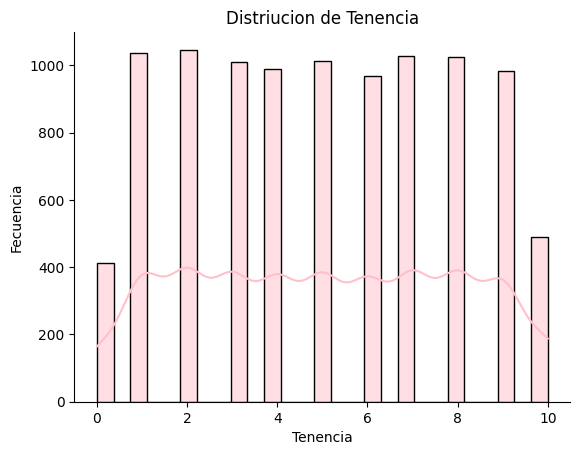

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tenure'], kde = True, color = 'pink')
plt.xlabel('Tenencia')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Tenencia')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no hay datos atipicos

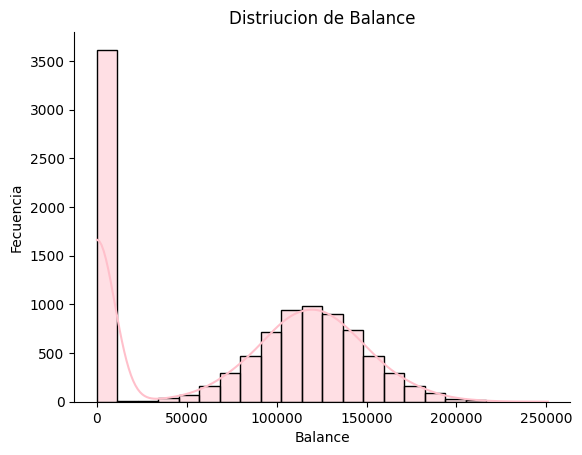

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Balance'], kde = True, color = 'pink')
plt.xlabel('Balance')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Balance')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# este si es atipico

In [11]:
df = df.loc[df["Balance"]!=0.0,:]
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,528,31.0,6,102016.72,2,0.0,0.0,80181.12,0
...,...,...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


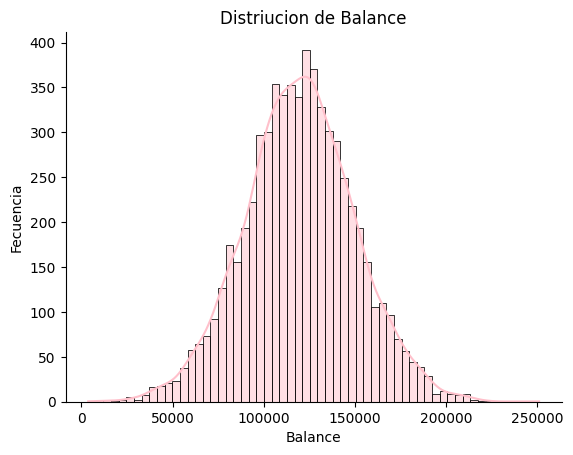

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Balance'], kde = True, color = 'pink')
plt.xlabel('Balance')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Balance')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [13]:
df["NumOfProducts"].unique()

array([1, 3, 2, 4])

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(NumOfProducts)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#los datos no aportan nada

,df,sum_sq,mean_sq,F,PR(>F)
C(NumOfProducts),3.0,1.666167e+10,5.553889e+09,1.68695,0.16751
Residual,6378.0,2.099808e+13,3.292267e+09,NaN,NaN


In [18]:
df.drop(columns = ["NumOfProducts"], inplace = True)
df

<ipython-input-18-30dabca20182>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["NumOfProducts"], inplace = True)


,CreditScore,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,1.0,112542.58,0
2,502,42.0,8,159660.80,0.0,113931.57,1
5,645,44.0,8,113755.78,0.0,149756.71,1
7,376,29.0,4,115046.74,0.0,119346.88,1
10,528,31.0,6,102016.72,0.0,80181.12,0
...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1.0,101699.77,0
9998,772,42.0,3,75075.31,0.0,92888.52,1
9999,772,42.0,3,75075.31,0.0,92888.52,1
10000,792,28.0,4,130142.79,0.0,38190.78,0


In [24]:
df["IsActiveMember"].unique()

array([1., 0.])

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(IsActiveMember)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(IsActiveMember),1.0,3.677991e+09,3.677991e+09,1.116821,0.290644
Residual,6380.0,2.101106e+13,3.293270e+09,NaN,NaN


In [26]:
df.drop(columns = ["IsActiveMember"], inplace = True)
df

<ipython-input-26-13c8f583d392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["IsActiveMember"], inplace = True)


,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
1,608,41.0,1,83807.86,112542.58,0
2,502,42.0,8,159660.80,113931.57,1
5,645,44.0,8,113755.78,149756.71,1
7,376,29.0,4,115046.74,119346.88,1
10,528,31.0,6,102016.72,80181.12,0
...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,101699.77,0
9998,772,42.0,3,75075.31,92888.52,1
9999,772,42.0,3,75075.31,92888.52,1
10000,792,28.0,4,130142.79,38190.78,0


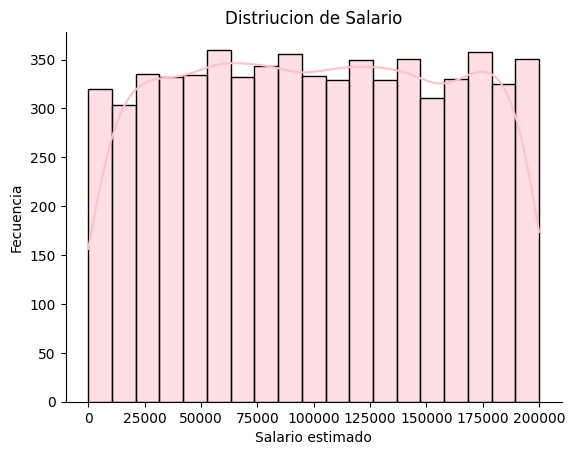

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['EstimatedSalary'], kde = True, color = 'pink')
plt.xlabel('Salario estimado')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Salario')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [28]:
df["Exited"].unique()

array([0, 1])

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(Exited)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#los datos no aportan nada

,df,sum_sq,mean_sq,F,PR(>F)
C(Exited),1.0,8.272243e+08,8.272243e+08,0.251152,0.616282
Residual,6380.0,2.101391e+13,3.293716e+09,NaN,NaN


In [31]:
df.drop(columns = ["Exited"], inplace = True)
df

<ipython-input-31-bac1af30eeba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["Exited"], inplace = True)


,CreditScore,Age,Tenure,Balance,EstimatedSalary
1,608,41.0,1,83807.86,112542.58
2,502,42.0,8,159660.80,113931.57
5,645,44.0,8,113755.78,149756.71
7,376,29.0,4,115046.74,119346.88
10,528,31.0,6,102016.72,80181.12
...,...,...,...,...,...
9996,516,35.0,10,57369.61,101699.77
9998,772,42.0,3,75075.31,92888.52
9999,772,42.0,3,75075.31,92888.52
10000,792,28.0,4,130142.79,38190.78


Text(0.5, 1.0, 'Matriz de Correlación')

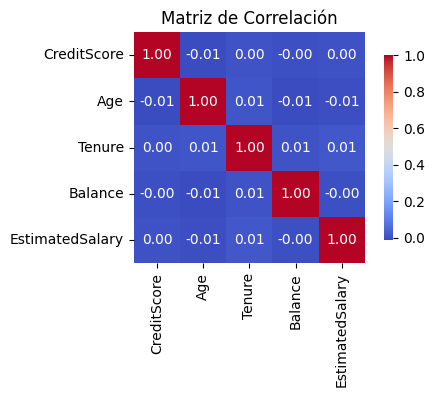

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación')

Conclusión
